<a href="https://colab.research.google.com/github/scudilio/text_mining/blob/master/twitter_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**WiDS: Análise de Texto em Python**

Dados do Twitter sobre Covid-19 do dia 29/03

[Dataset](https://www.kaggle.com/smid80/coronavirus-covid19-tweets-early-april)

#Importando as bibliotecas necessárias

In [ ]:
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

# python imports
import re
import json
import os
from collections import Counter
import datetime as dt

# Visualization
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm_notebook


#Importando o Dataset

In [ ]:
# Reading data
#df=pd.read_csv('2020-04-20 Coronavirus Tweets.CSV')
df = pd.read_csv('2020-03-29 Coronavirus Tweets.CSV')

df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(564141, 22)

#**Variáveis do Dataset**

In [ ]:
# display columns
print ("Colunas Originais ")
df.columns

Colunas Originais 


Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

#**Eliminando Variáveis**

In [ ]:
# dropping columns
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id','reply_to_user_id','is_retweet','place_full_name','place_type','reply_to_screen_name','is_quote','followers_count','friends_count','account_lang','account_created_at','verified'],axis=1, inplace = True)
tweet.head(10)

NameError: ignored

##**Filtrando os dados em Português**

In [ ]:
# filtering data with 'language = pt'
tweet = tweet[(tweet.lang == "pt")].reset_index(drop = True)
tweet.drop(['country_code','lang'], axis = 1, inplace = True)



tweet.head()

NameError: ignored

In [ ]:
# filtering data with 'country_code = IN' and 'language = en'
#tweet =tweet[(tweet.country_code == "BR") & (tweet.lang == "pt")].reset_index(drop = True)
#tweet.drop(['country_code','lang'],axis=1,inplace=True)
#tweet.head()

In [ ]:
# check missing values
tweet.isna().sum()

created_at          0
text                0
favourites_count    0
retweet_count       0
sentiment           0
polarity            0
dtype: int64

In [ ]:
 #shape
tweet.shape



(10532, 6)

#**Tweet Mais Curtido**

In [ ]:
# # Top 5 most favourited tweets:
fav = tweet[['favourites_count','text']].sort_values('favourites_count', ascending = False)[:10].reset_index()
for i in range(10):
    print(i,']', fav['text'][i],'\n')
    


0 ] Amonimento da #Singapore #covid19 #coronavirus https://t.co/HQOpEmXwsx 

1 ] Quantos primos o porteiro tem?  

Porque já vi em mais de 300 pessoas.. Kk

Fakenews do gado é demais. 
Mas pra quem acreditou em mamadeira de piroca né? 
#Covid19NasFavelas #Covid_19 #coronavirusnobrasil 

2 ] 838 mortes em 24 horas, o bagulho tá louco e vocês dando risada

"Espanha tem novo recorde de mortes mas ritmo de infeções diminui" #Coronavirus https://t.co/fII6UtlYYn 

3 ] Só não vê quem não quer, o Bolsonero tá IMPLORANDO pra sair. #coronavirusnobrasil #coronavirus 

4 ] Corona vairus #coronavirusbrasil #coronavirus https://t.co/RPxf06rPNh 

5 ] Em PE👉🏻 atuação conjunta contra #CarreataDaMorte do #CapitaoCorona

"APREENDA TODOS OS VEÍCULOS UTILIZADOS NA CARREATA, COLOCANDO-OS À DISPOSIÇÃO DO SERVIÇO PÚBLICO PARA COMBATE À #COVID19, inclusive com a possibilidade de perdimento a favor do Estado de PE e Município do Recife" https://t.co/WvRUpj3NqP 

6 ] #COVID19 que Dr. Chanta. https://t.co/11FJyHe

##**Tweet com mais Retweet**

In [ ]:
# #Top 5 most retweeted tweets:
retweet = tweet[['retweet_count','text']].sort_values('retweet_count',ascending = False)[:10].reset_index()
for i in range(10):
    print(i,']', retweet['text'][i],'\n')

0 ] Nao especialista assunto posso dar testemunho. Minha mãe 68 anos diagnosticada #Covid_19 última quinta-feira desde então sendo tratada CLOROQUINA AZITROMICINA casa tendo melhora surpreendente. 🙏🏻🙏🏻🙏🏻🙏🏻 

1 ] A matemática macabra político-midiática conta 1 1 mortes atribuídas #CoronaVírus explora exaustivamente infligir pânico sociedade. Fosse aplicada epidemia assassinatos (500 mil última década), ninguém sairia casa, sequer ir mercado. 

2 ] GENOCÍDIO palavra PAPA usou criticar CERTOS GOVERNOS priorizam salvar economia pessoas crise #coronavírus https://t.co/BItHhq8Eao 

3 ] ATUALIZAÇÃO - @minsaude atualiza situação #coronavírus 🇧🇷 - 29/03 ▶️4.256 casos ▶️ 136 óbitos Saiba https://t.co/UYm3jliCGA #COVID19 https://t.co/24P5Wy2Es7 

4 ] Somos única família humana. Que cesse toda hostilidade bélica. Que esforço conjunto contra pandemia #COVID19 faça reconhecer necessidade fortalecer laços fraternos. @antonioguterres @UN 

5 ] Se Bolsonaro adoecer #Covid_19 tratado melhor disponível M

##**Número de Tweets por Hora**

In [ ]:
# created_at column
tweet["created_at"] = tweet["created_at"].apply(lambda i:(int(i.split("T")[1].split(":")[0])+int(i.split("T")[1].split(":")[1])/60))
tweet["created_at"]

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
10527    23.983333
10528    23.983333
10529    23.983333
10530    23.983333
10531    23.983333
Name: created_at, Length: 10532, dtype: float64

Text(0.5, 1.0, 'Nº. de Tweets por Hora')

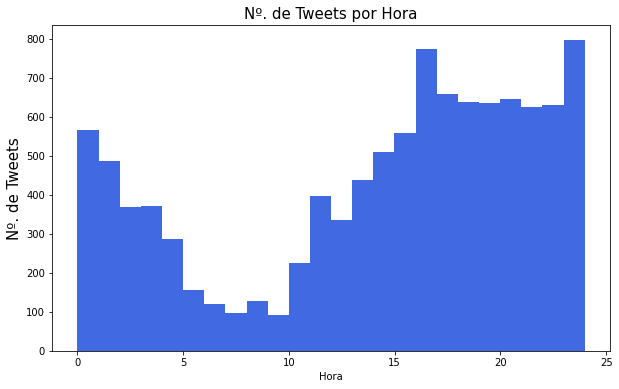

In [ ]:
plt.figure(1, figsize=(10,6))
plt.hist(tweet["created_at"],bins = 24, color = "#4169e1" );
plt.xlabel('Hora')
plt.ylabel('Nº. de Tweets',size = 15)
plt.title('Nº. de Tweets por Hora',size = 15)


##**Word Cloud**

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color = 'black', max_words = 500, max_font_size =50).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

NameError: ignored

# **Processamento dos dados**

* Removendo as stop words


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk.corpus
stop_words=nltk.corpus.stopwords.words('portuguese') #lista de stopword em ingles, stopw word palavras que não traz significado para o texto como: para, a, também,o
stop_words#lista de stop word da biblioteca nltk

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [ ]:
stop_words=set(stop_words)
stop_words.update(['#coronavirus','tá','coronavirusbrasil','pra','agora','todo', 'sobre','Brasil','aí','taí', 'coronavírus', '#covid19', '#covid_19', 'CO', 'coronavirus','covid_19','COVID','CO' 'Covid_19','covid19','https'])
stop_words

{'#coronavirus',
 '#covid19',
 '#covid_19',
 'Brasil',
 'CO',
 'COCovid_19',
 'COVID',
 'a',
 'agora',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'aí',
 'com',
 'como',
 'coronavirus',
 'coronavirusbrasil',
 'coronavírus',
 'covid19',
 'covid_19',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'hei',
 'houve',
 '

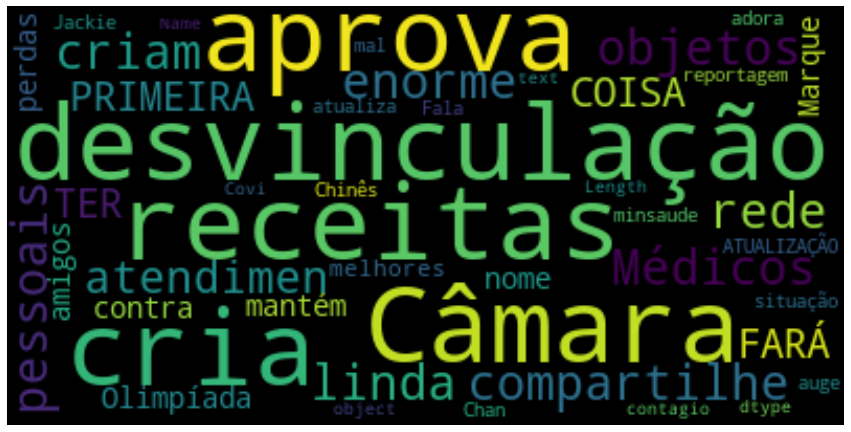

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color = 'black', stopwords = stop_words,  max_font_size =50).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

#**Token**

In [ ]:
#Removing Stop Words
stop_words

tweet['text'] = tweet['text'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word not in stop_words]))
tweet['text'].head() 

0    Câmara aprova desvinculação receitas cria fund...
1    #Coronavirus (NÃO compartilhe objetos pessoais...
2    Médicos criam enorme linda rede atendimento gr...
3    QUAL A PRIMEIRA COISA QUE VOCÊ FARÁ QUANDO TER...
4    Olimpíada mantém 2020 nome contra perdas. Via ...
Name: text, dtype: object

In [ ]:
# tokenização tweets, "separando" as palavras 
nltk.download('punkt')
from nltk.tokenize import word_tokenize

word_tokens = []
tw=tweet['text']
for tw in tw:
  word_tokens = word_tokens+word_tokenize(tw)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
filtered_word = [w for w in word_tokens if not w in stop_words]#filtrando, eliminando as stop words tweet
print(filtered_word[:13])


['Câmara', 'aprova', 'desvinculação', 'receitas', 'cria', 'fundo', 'combate', '.', 'Todos', 'gastos', 'devem', 'ser', 'publicados']


In [ ]:

#numero de palavras das reviews
len(filtered_word)

244655

In [ ]:
# concatenar as palavras
all_summary = " ".join(s for s in filtered_word)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 1564612


In [ ]:
all_summary

"Câmara aprova desvinculação receitas cria fundo combate . Todos gastos devem ser publicados site oficial Prefeitura Rio . # Coronavirus # BandNewsFM : //t.co/WAItVXHUfp # Coronavirus ( NÃO compartilhe objetos pessoais ) ~Ouça Atualizações Região SUDESTE~ : //t.co/VTTLx7abGg Médicos criam enorme linda rede atendimento gratuito redes sociais , e-mail WhatsApp esclarecer dúvidas : //t.co/cWF5hM3YeG Profissionais saúde trabalham horas extras levar orientação confiável pacientes , amigos vizinhos : //t.co/FOOGjYhyve QUAL A PRIMEIRA COISA QUE VOCÊ FARÁ QUANDO TERMINAR A QUARENTENA ? ) mergulhar b ) mergulhar Maceió c ) mergulhar Maceió Let ’ s Dive d ) mergulhar naufrágio Maceió Let ’ s Dive 🤔 conta aqui gente ! # LetsDive # mergulho # COVID19 # quarentena Olimpíada mantém 2020 nome contra perdas . Via @ meioemensagem : //t.co/DxYCW4CEOY # dicapipa # dicadeleitura # digital # Covid_19 # Cidade # SantoAndré ( # ABCDPaulista ) MERENDA EM CASA 20 mil kits alimentares : - Arroz , feijão , macar

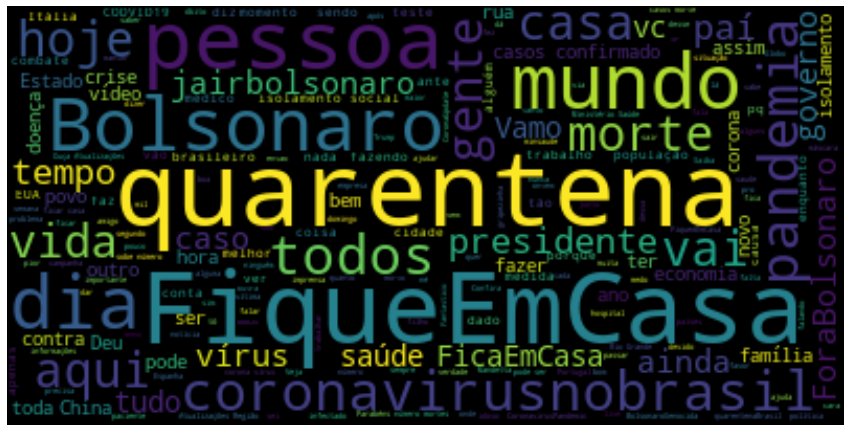

In [ ]:

show_wordcloud(all_summary)

In [ ]:
##Considerar apenas adjetivos
##JJ como o pacote categoriza adj
import nltk
nltk.download('averaged_perceptron_tagger')
adjs=[word for (word,pos) in nltk.pos_tag(filtered_word)if(pos[:2]== 'JJ')]
print(adjs)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['desvinculação', 'fundo', 'oficial', '//t.co/WAItVXHUfp', 'e-mail', '//t.co/cWF5hM3YeG', 'levar', 'amigos', '//t.co/FOOGjYhyve', 'naufrágio', 'LetsDive', 'mergulho', 'nome', 'contra', '@', '//t.co/DxYCW4CEOY', 'dicapipa', 'digital', 'leite', 'biscoito', 'entrega', 'permita', 'lá', 'confiaefaz', 'marketingdigital', 'vendasonline', 'mudanças', 'necessidade', '//t.co/7n9vLP0V8l', 'instituições', 'crianças', 'idosos', 'quarentena', 'fozdoiguaçu', 'câmarafoz', 'tvcâmarafoz', 'cmfi', 'poderlegislativofoz', 'vereadoresfoz', 'coronavirusemfozdoiguaçu', '//t.co/BnRqZH3eLT', 'vive', 'usar', 'corporal', 'quarentena', 'lá', 'africa', '🔥🙏🏽', '//t.co/AR6ePAnly6', 'casa', 'live', 'falar', 'celsolisboa', 'quarentenanaosaoferias', '//t.co/JYfx1iOORf', 'É', 'pena', '//t.co/jSa2Duae6F', 'fiqueemcasa', 'quarentena', 'ap

In [ ]:
print(adjs)

['desvinculação', 'fundo', 'oficial', '//t.co/WAItVXHUfp', 'e-mail', '//t.co/cWF5hM3YeG', 'levar', 'amigos', '//t.co/FOOGjYhyve', 'naufrágio', 'LetsDive', 'mergulho', 'nome', 'contra', '@', '//t.co/DxYCW4CEOY', 'dicapipa', 'digital', 'leite', 'biscoito', 'entrega', 'permita', 'lá', 'confiaefaz', 'marketingdigital', 'vendasonline', 'mudanças', 'necessidade', '//t.co/7n9vLP0V8l', 'instituições', 'crianças', 'idosos', 'quarentena', 'fozdoiguaçu', 'câmarafoz', 'tvcâmarafoz', 'cmfi', 'poderlegislativofoz', 'vereadoresfoz', 'coronavirusemfozdoiguaçu', '//t.co/BnRqZH3eLT', 'vive', 'usar', 'corporal', 'quarentena', 'lá', 'africa', '🔥🙏🏽', '//t.co/AR6ePAnly6', 'casa', 'live', 'falar', 'celsolisboa', 'quarentenanaosaoferias', '//t.co/JYfx1iOORf', 'É', 'pena', '//t.co/jSa2Duae6F', 'fiqueemcasa', 'quarentena', 'apenas', 'altura', 'solução', 'bajular', 'mostra', 'nada', 'gente', 'fazendo', 'É', 'nessa', 'acompanhar', 'vídeo', '//t.co/O1ZnmfDaBV', 'ufopa', 'falando', 'coronavirusnobrasil', 'falar', '

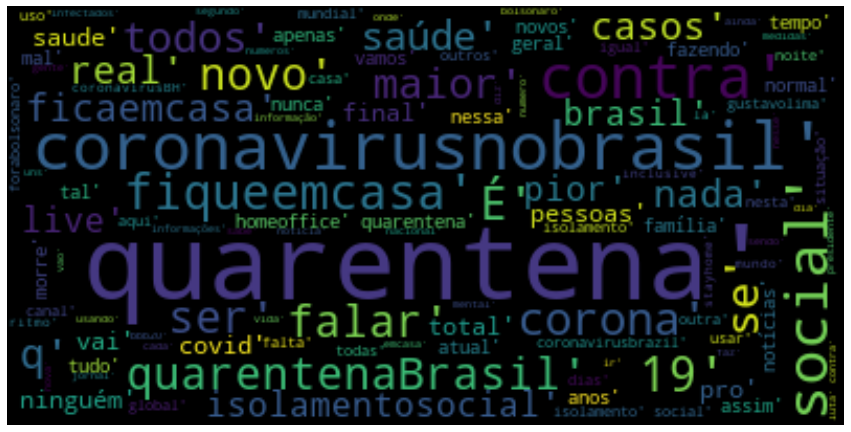

In [ ]:
show_wordcloud(adjs)

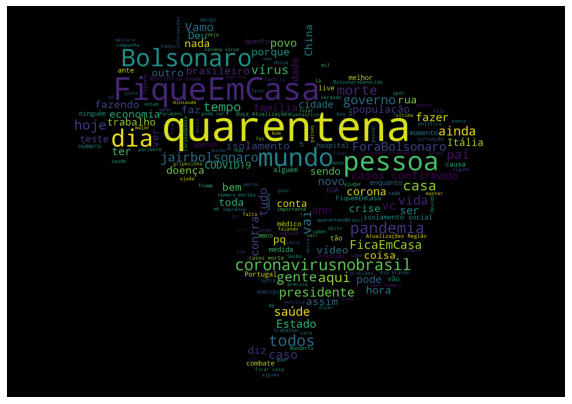

In [ ]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

covid_mask = np.array(Image.open("brasil.jpg"))
image_colors = ImageColorGenerator(covid_mask)
wordcloud = WordCloud(background_color = 'black', 
                    stopwords = stop_words, mask=covid_mask).generate(all_summary)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

##**Análise de Sentimento**

In [ ]:
from textblob import TextBlob
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'


In [ ]:
tweet.head(5)

created_at  ... polarity
0         0.0  ...        0
1         0.0  ...        0
2         0.0  ...        0
3         0.0  ...        0
4         0.0  ...        0

[5 rows x 6 columns]

neutral     9698
positive     639
negative     195
Name: sentiment, dtype: int64


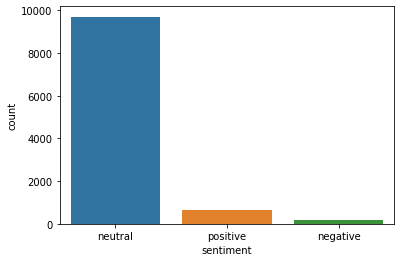

In [ ]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

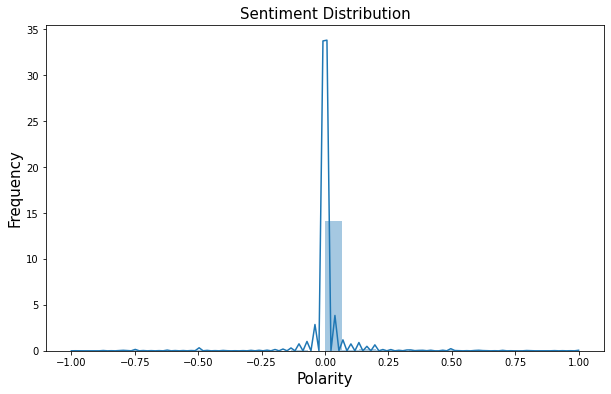

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

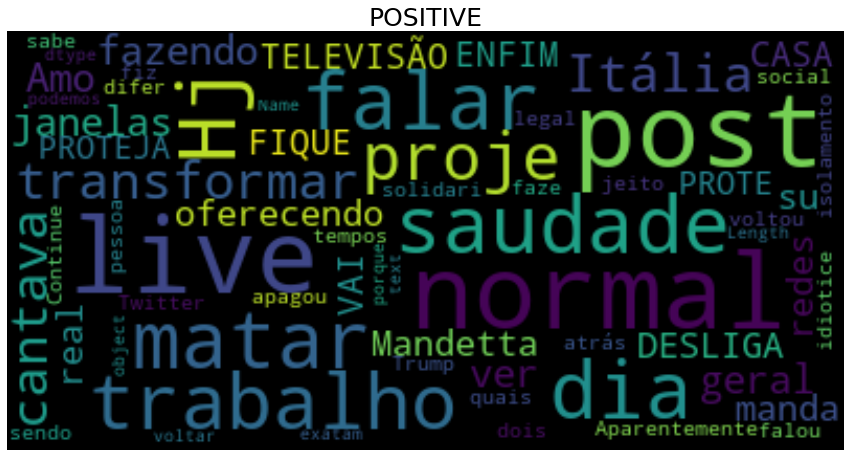

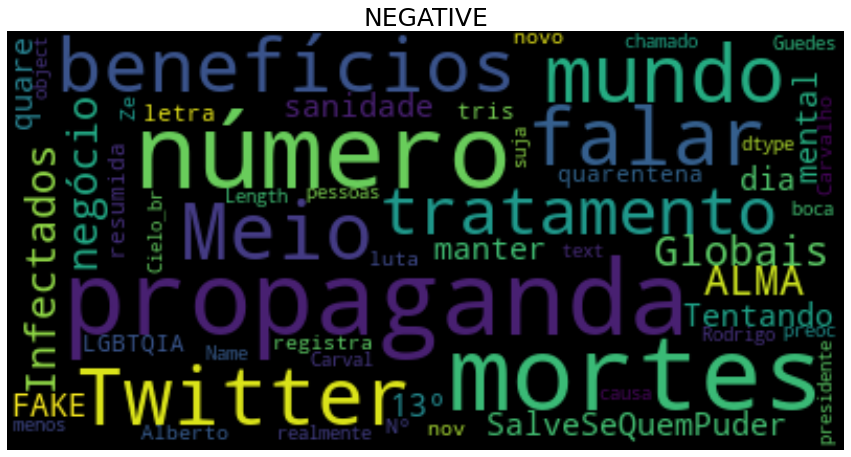

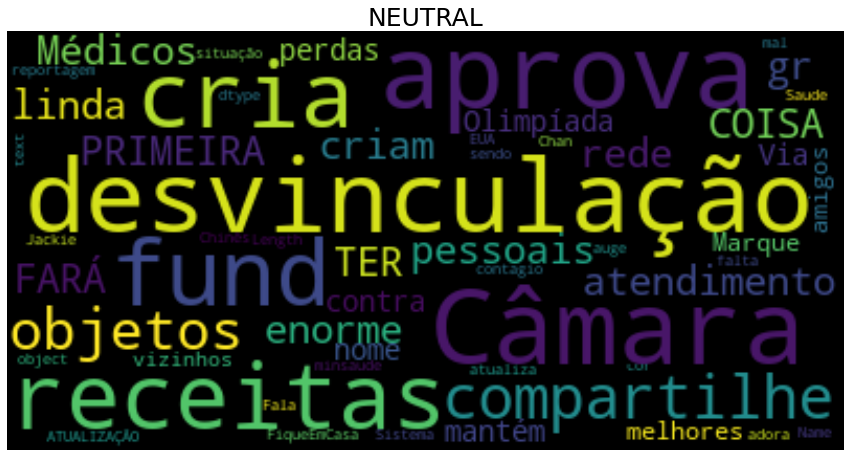

In [ ]:
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'POSITIVE')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'NEUTRAL')